In [3]:
import numpy as np
import pandas as pd

# Задание 1
### Извлечение данных

In [4]:
def read_txt(path):
    with open(path, 'r') as file:
        columns = file.readline().split()
        data = [[], [], [], []]
        for line in file:
            string = line.split()
            data[0].append(string[0])
            data[1].append(string[1])
            data[2].append(int(string[2]))
            data[3].append(string[3])
        dataframe = pd.DataFrame()
        for clm, arr in zip(columns, data):
            dataframe[clm] = arr     
        return dataframe

In [5]:
PATH = '10123.23andme.8395.txt'

In [6]:
data = read_txt(PATH)
data

,rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs9283150,1,565508,AA
2,rs116587930,1,727841,AG
3,rs3131972,1,752721,AG
4,rs12184325,1,754105,CC
...,...,...,...,...
631950,i4000693,MT,16524,A
631951,i704756,MT,16524,A
631952,i705255,MT,16525,A
631953,i4000757,MT,16526,G


# Задание 2 
### Какой наиболее вероятный цвет глаз у этого человека?

Для того, чтобы понять какой цвет глаз у человека проверим 6 основных снипов на сайте https://hirisplex.erasmusmc.nl. Заметим, что на сайте взята '-' цепь, следовательно нам нужно смотерть комплементарные нуклеотиды данным.
#### HERC2 rs12913832 T

In [7]:
data.loc[data['rsid'] == 'rs12913832']

,rsid,chromosome,position,genotype
487205,rs12913832,15,28365618,GG


На эту позицию выставляем 0 совпадений, так как G не комплементарна T, следовательно на обратном стренде нет совпадений.

#### OCA2	rs1800407	A

In [8]:
data.loc[data['rsid'] == 'rs1800407']

,rsid,chromosome,position,genotype
487165,rs1800407,15,28230318,CC


На эту позицию выставляем 0 совпадений, так как A не комплементарна C, следовательно на обратном стренде нет совпадений.

#### LOC105370627	rs12896399	T

In [9]:
data.loc[data['rsid'] == 'rs12896399']

,rsid,chromosome,position,genotype
482103,rs12896399,14,92773663,GG


На эту позицию выставляем 0 совпадений, так как G не комплементарна T, следовательно на обратном стренде нет совпадений.

#### SLC45A2	rs16891982	C

In [10]:
data.loc[data['rsid'] == 'rs16891982']

,rsid,chromosome,position,genotype
189754,rs16891982,5,33951693,GG


На эту позицию выставляем 2 совпадения, так как G комплементарна C, следовательно на обратном стренде 2 совпадения.

#### TYR	rs1393350	T

In [11]:
data.loc[data['rsid'] == 'rs1393350']

,rsid,chromosome,position,genotype
403558,rs1393350,11,89011046,GG


На эту позицию выставляем 0 совпадений, так как G не комплементарна T, следовательно на обратном стренде нет совпадений.

#### IRF4	rs12203592	T

In [12]:
data.loc[data['rsid'] == 'rs12203592']

,rsid,chromosome,position,genotype
218745,rs12203592,6,396321,CC


На эту позицию выставляем 0 совпадений, так как C не комплементарна T, следовательно на обратном стренде нет совпадений.

Вывод: с наибольшей вероятностью у данного человека карие глаза, однако на сайте, где мы брали данные, можно посмотреть его фенотип и обнаружить, что у него они должны быть зеленые.
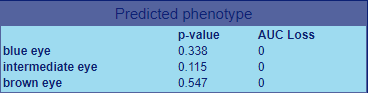

### Повышен или понижен риск тромбоза у данного человека?

Проверим приведенные в задании снипы.

In [13]:
data.loc[data['rsid'].isin(['rs6025', 'rs1799963', 'rs8176719', 'rs2066865', 'rs2036914'])]

,rsid,chromosome,position,genotype
31308,rs6025,1,169519049,CC
173354,rs2066865,4,155525276,GG
180787,rs2036914,4,187192481,CT
352300,rs8176719,9,136132909,DD


По снипу rs1799963 данные отсутствуют

1) Для снипа rs6025 указано, что при генотипе GG риско обычный, следовательно, так как мы имеем генотип C, то мы можем сделать вывод, что данный снип не повышает риск тромбоза. (у меня '+' стренд)

2) Для снипа rs2066865 указано, что при генотипе CC риск обычный, следовательно, так как мы имеем генотип GG, то мы можем сделать вывод, что данный снип не повышает риск тромбоза. (у меня '+' стренд)

3) Для снипа rs2036914 согласно статье указано, что данный генотип коррелирован с повышенным риском тромбоза.

https://pubmed.ncbi.nlm.nih.gov/19583818/
https://onlinelibrary.wiley.com/doi/full/10.1111/j.1538-7836.2009.03544.x

4) Для снипа rs8176719 мы имеем генотип DD, согласно snpedia данный человек имеет группу крови O для, которая, согласно статье, не коррелирована с тромбозом.

https://www.snpedia.com/index.php/Rs8176719
https://pubmed.ncbi.nlm.nih.gov/32671915/
https://onlinelibrary.wiley.com/doi/10.1111/jth.15011


Вывод: таким образом вероятность тромбоза у этого человека несколько повышена, так как один из снипов повышает риск.

# Задание 3-5

In [14]:
data.loc[data['rsid'].isin(['rs7495174', 'rs6497268', 'rs11855019'])] # ассоциация с зеленым цветом глаз

,rsid,chromosome,position,genotype
487197,rs7495174,15,28344238,AA


Из профиля человека мы знаем, что у него зеленые глаза, однако тест в Задании 2 не показал хороших результатов и дал расплывчивый результат, поэтому дополнительно проверив этот снип, мы с большей вероятностью можем утверждать, что у данного индивида зеленые глаза.

### Непереносимость лактозы

In [19]:
data.loc[data['rsid'] == 'rs4988235']

,rsid,chromosome,position,genotype
77005,rs4988235,2,136608646,GG


На snpedia указан генотип для обратного стренда, следовательно в такой ситуации у нашего индивида генотип CC. Данный генотип повышает вероятность того, что при взросленнии у человека появится непереносимость лактозы.
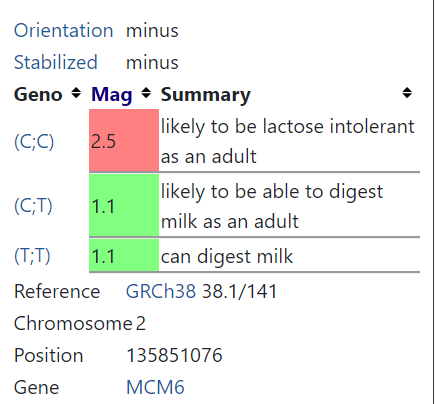

### Ишемическая болезнь сердца

In [20]:
data.loc[data['rsid'] == 'rs1333049']

,rsid,chromosome,position,genotype
334187,rs1333049,9,22125503,CC


Вероятность того, что у человека может быть ИБС повышена в 1.9 раз, так как генотип совпадает с рисковым на snpedia (генотип CC).
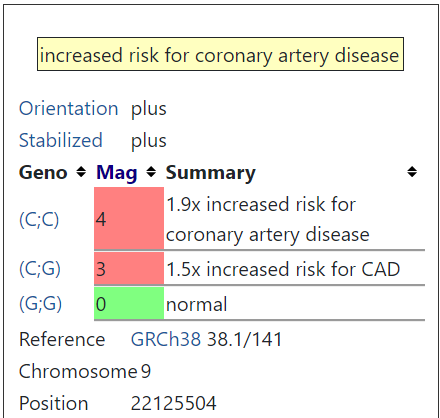

### Диабет 2-ого типа

In [21]:
data.loc[data['rsid'] == 'rs12255372']

,rsid,chromosome,position,genotype
378477,rs12255372,10,114808902,GT


Генотип совпадает с предложенным на snpedia, поэтому риск приобретения диабета 2-ого типа увеличен в 1.3 раза (генотип GT).
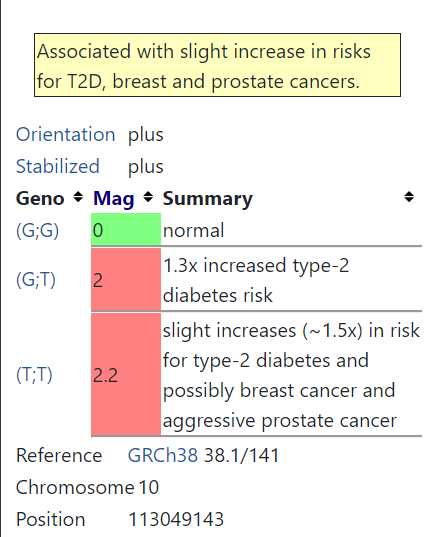

### Риск инфаркта

In [22]:
data.loc[data['rsid'] == 'rs662799']

,rsid,chromosome,position,genotype
409634,rs662799,11,116663707,AG


У данного человека в 1.4 раза повышен шанс сердеченого приступа по сравнениюю с обычным (генотип AG). Однако, что интересно, данный индивид не будет сильно набирать вес при жирной диете.
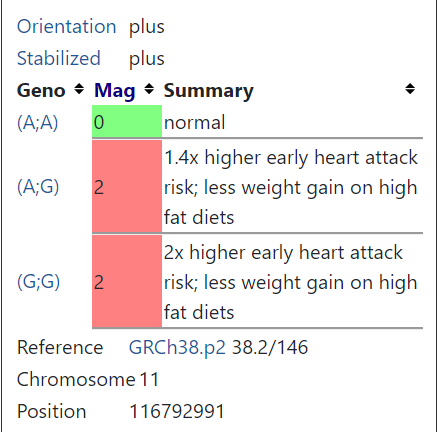